In [15]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Cap2/random_training_set_80.csv')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65865 entries, 0 to 65864
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 65865 non-null  int64  
 1   dur                65865 non-null  float64
 2   proto              65865 non-null  object 
 3   service            65865 non-null  object 
 4   state              65865 non-null  object 
 5   spkts              65865 non-null  int64  
 6   dpkts              65865 non-null  int64  
 7   sbytes             65865 non-null  int64  
 8   dbytes             65865 non-null  int64  
 9   rate               65865 non-null  float64
 10  sttl               65865 non-null  int64  
 11  dttl               65865 non-null  int64  
 12  sload              65865 non-null  float64
 13  dload              65865 non-null  float64
 14  sloss              65865 non-null  int64  
 15  dloss              65865 non-null  int64  
 16  sinpkt             658

In [18]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,38667,1.292678,tcp,ftp,FIN,52,54,2934,3740,81.226725,31,29,1.781109e+04,22718.728520,11,15,25.340315,24.379660,2032.399964,67.804586,255,1861926481,1972779139,255,0.000703,0.000548,0.000155,56,69,0,0,1,0,5,1,1,4,1,1,0,7,1,0,Normal,0
1,56461,0.000007,udp,dns,INT,2,0,114,0,142857.140900,254,0,6.514286e+07,0.000000,0,0,0.007000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,10,2,4,5,4,4,0,0,0,5,4,0,Generic,1
2,16267,0.000010,udp,dns,INT,2,0,114,0,100000.002500,254,0,4.560000e+07,0.000000,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,51,2,23,23,13,51,0,0,0,23,51,0,Generic,1
3,75604,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.752000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
4,11201,0.189998,tcp,-,FIN,10,6,1460,268,78.948199,254,252,5.532690e+04,9431.677734,2,1,19.378444,36.389602,1025.975620,60.734199,255,190656160,3729297770,255,0.057777,0.008046,0.049731,146,45,0,0,1,1,1,1,1,1,0,0,0,1,1,0,Exploits,1
5,21825,0.000008,udp,dns,INT,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,18,18,18,24,0,0,0,19,24,0,Generic,1
6,28686,0.018855,tcp,-,FIN,16,18,1540,1644,1750.198894,31,29,6.126757e+05,658923.375000,4,4,1.236200,1.077000,74.172985,2.182503,255,1379963200,1384679756,255,0.000676,0.000543,0.000133,96,91,0,0,7,0,7,6,1,6,0,0,0,9,11,0,Normal,0
7,65458,0.558848,tcp,-,FIN,10,14,794,6798,41.156091,62,252,1.023534e+04,90371.617190,2,4,62.094222,38.441385,3779.376221,3149.359056,255,321857326,1523280552,255,0.121613,0.058328,0.063285,79,486,0,0,1,1,1,1,1,1,0,0,0,1,1,0,Exploits,1
8,78820,2.020807,tcp,-,FIN,10,8,842,354,8.412481,254,252,3.000781e+03,1227.232422,2,1,224.534111,277.363156,14143.321500,402.606250,255,1316255462,3362912266,255,0.156175,0.077776,0.078399,84,44,0,0,1,1,1,1,1,1,0,0,0,1,2,0,Normal,0
9,8318,0.000009,unas,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,7,2,3,3,3,7,0,0,0,3,7,0,Exploits,1


In [19]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,65865.000000,65865.000000,65865,65865,65865,65865.000000,65865.000000,6.586500e+04,6.586500e+04,6.586500e+04,65865.000000,65865.000000,6.586500e+04,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,6.586500e+04,65865.000000,65865.000000,6.586500e+04,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865,65865.000000
unique,NaN,NaN,131,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,34475,37695,31454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29651,NaN
mean,41254.877052,1.011704,NaN,NaN,NaN,19.020405,17.550474,8.424135e+03,1.315797e+04,8.245033e+04,180.805435,95.665270,6.456458e+07,6.258519e+05,4.932362,6.274926,757.660717,119.330527,6.279925e+03,541.571173,133.452562,1.082796e+09,1.073468e+09,128.174873,0.055842,0.029225,0.026617,139.160814,116.826175,0.092978,1.702306e+03,9.539027,1.370151,5.748136,4.932073,3.660077,7.450907,0.008442,0.008533,0.128870,6.468246,9.154756,0.011235,NaN,0.549822
std,23734.686692,4.719525,NaN,NaN,NaN,142.360130,104.560589,1.833585e+05,1.361578e+05,1.488827e+05,101.569846,116.643102,1.812370e+08,2.378106e+06,69.086508,49.816365,6197.840784,1266.652149,5.604080e+04,3856.081697,127.356388,1.390058e+09,1.383202e+09,127.492282,0.114329,0.070437,0.054178,207.887687,245.795851,0.295534,4.096551e+04,11.092469,1.070780,8.435915,8.406962,5.916522,11.418383,0.091986,0.093126,0.633565,8.559911,11.122867,0.105399,NaN,0.497515
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20722.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.859790e+01,62.000000,0.000000,1.117597e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41281.000000,0.014023,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.636987e+03,254.000000,29.000000,5.753694e+05,2.124753e+03,1.000000,0.000000,0.560943,0.010000,1.771163e+01,0.000000,255.000000,2.521428e+07,2.404131e+07,255.000000,0.000526,0.000431,0.000000,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61816.000000,0.718675,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.614304e+04,3.000000,2.000000,63.549778,63.201000,3.222219e+03,128.830750,255.000000,2.167137e+09,2.142900e+09,255.000000,0.105662,0.052711,0.048792,100.00000

In [20]:
list_drop = ['id','attack_cat']

In [21]:
df.drop(list_drop,axis=1,inplace=True)

In [22]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,65865.000000,65865.000000,65865.000000,6.586500e+04,6.586500e+04,6.586500e+04,65865.000000,65865.000000,6.586500e+04,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,6.586500e+04,65865.000000,65865.000000,6.586500e+04,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000
mean,1.011704,19.020405,17.550474,8.424135e+03,1.315797e+04,8.245033e+04,180.805435,95.665270,6.456458e+07,6.258519e+05,4.932362,6.274926,757.660717,119.330527,6.279925e+03,541.571173,133.452562,1.082796e+09,1.073468e+09,128.174873,0.055842,0.029225,0.026617,139.160814,116.826175,0.092978,1.702306e+03,9.539027,1.370151,5.748136,4.932073,3.660077,7.450907,0.008442,0.008533,0.128870,6.468246,9.154756,0.011235,0.549822
std,4.719525,142.360130,104.560589,1.833585e+05,1.361578e+05,1.488827e+05,101.569846,116.643102,1.812370e+08,2.378106e+06,69.086508,49.816365,6197.840784,1266.652149,5.604080e+04,3856.081697,127.356388,1.390058e+09,1.383202e+09,127.492282,0.114329,0.070437,0.054178,207.887687,245.795851,0.295534,4.096551e+04,11.092469,1.070780,8.435915,8.406962,5.916522,11.418383,0.091986,0.093126,0.633565,8.559911,11.122867,0.105399,0.497515
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.859790e+01,62.000000,0.000000,1.117597e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014023,6.000000,2.000000,5.340000e+02,1.780000e+02,2.636987e+03,254.000000,29.000000,5.753694e+05,2.124753e+03,1.000000,0.000000,0.560943,0.010000,1.771163e+01,0.000000,255.000000,2.521428e+07,2.404131e+07,255.000000,0.000526,0.000431,0.000000,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.718675,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.614304e+04,3.000000,2.000000,63.549778,63.201000,3.222219e+03,128.830750,255.000000,2.167137e+09,2.142900e+09,255.000000,0.105662,0.052711,0.048792,100.000000,88.000000,0.000000,0.000000e+00,11.000000,2.000000,5.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,10872.000000,1.435577e+07,1.459086e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5436.000000,60001.476000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294950e+09,4.294881e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,9.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [23]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [24]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,65865.000000,65865.000000,65865.000000,65865.000000,65865.00000,65865.000000,65865.000000,65865.000000,6.586500e+04,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,6.586500e+04,6.586500e+04,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000,65865.000000
mean,0.446108,11.822531,9.181963,1578.089881,2876.03577,71521.412018,180.805435,95.665270,4.640862e+07,3.092451e+05,2.187262,2.546800,37.835343,33.881752,1920.259697,202.951195,133.452562,1.072103e+09,1.062790e+09,128.174873,0.055842,0.029225,0.026617,124.491445,101.436241,0.092978,9.873453,9.253655,1.370151,5.268883,4.466302,3.386153,7.156684,0.008442,0.008533,0.092264,5.971108,8.824398,0.011235,0.549822
std,0.674686,15.635959,14.512891,2945.684658,7538.09218,102643.175181,101.569846,116.643102,7.415835e+07,8.863130e+05,3.057355,4.773565,57.595626,51.996752,2897.696355,531.017816,127.356388,1.367283e+09,1.360315e+09,127.492282,0.114329,0.070437,0.054178,147.857806,187.333455,0.295534,36.766612,10.229184,1.070780,6.739356,6.695496,5.031301,10.490725,0.091986,0.093126,0.289401,6.876200,10.131533,0.105399,0.497515
min,0.000000,1.000000,0.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.00000,28.597901,62.000000,0.000000,1.117597e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014023,6.000000,2.000000,534.000000,178.00000,2636.986999,254.000000,29.000000,5.753694e+05,2.124753e+03,1.000000,0.000000,0.560943,0.010000,17.711629,0.000000,255.000000,2.521428e+07,2.404131e+07,255.000000,0.000526,0.000431,0.000000,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.718675,12.000000,10.000000,1280.000000,956.00000,111111.107200,254.000000,252.000000,6.514286e+07,1.614304e+04,3.000000,2.000000,63.549778,63.201000,3222.218609,128.830750,255.000000,2.167137e+09,2.142900e+09,255.000000,0.105662,0.052711,0.048792,100.000000,88.000000,0.000000,0.000000,11.000000,2.000000,5.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.415522,60.000000,54.000000,12472.000000,30622.00000,333333.321500,255.000000,253.000000,2.666667e+08,3.722776e+06,11.000000,18.000000,204.425142,166.760597,9530.711505,2262.536998,255.000000,3.871829e+09,3.865874e+09,255.000000,3.821465,3.226788,2.928778,638.000000,701.000000,9.000000,154.000000,37.000000,6.000000,25.000000,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


In [25]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [26]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,65865,65865,65865
unique,131,13,5
top,tcp,-,FIN
freq,34475,37695,31454


In [27]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [28]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,65865,65865,65865
unique,6,5,5
top,tcp,-,FIN
freq,34475,39382,31454


In [29]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [30]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

In [31]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(65865, 42)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
np.shape(X)

(65865, 55)

In [36]:
df_cat.describe(include='all')

,proto,service,state
count,65865,65865,65865
unique,6,5,5
top,tcp,-,FIN
freq,34475,39382,31454


In [37]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.29720567e-01, 3.95124372e+00, 4.00733319e+00, 7.98412196e+00,
       8.22710823e+00, 4.40948037e+00, 3.10000000e+01, 2.90000000e+01,
       9.78763249e+00, 1.00309889e+01, 1.10000000e+01, 1.50000000e+01,
       3.27110066e+00, 3.23394807e+00, 7.61746453e+00, 4.23127040e+00,
       2.55000000e+02, 2.13448775e+01, 2.14027091e+01, 2.55000000e+02,
       7.02753011e-04, 5.47849903e-04, 1.54987989e-04, 4.02535169e+00,
       4.24849524e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 5.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       4.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       7.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [38]:
len(feature_names)

42

In [39]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [40]:
len(feature_names)

55

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

In [42]:
df_cat.describe(include='all')

,proto,service,state
count,65865,65865,65865
unique,6,5,5
top,tcp,-,FIN
freq,34475,39382,31454


In [43]:
pip install --upgrade scikit-learn

In [44]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 17:] = sc.fit_transform(X_train[:, 17:])
X_test[:, 17:] = sc.transform(X_test[:, 17:])

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [46]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 2.08 s, sys: 591 ms, total: 2.67 s
Wall time: 1.64 s


In [47]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.88%
Recall: 92.88%
Precision: 92.96%
F1-Score: 92.89%
time to train: 1.64 s
time to predict: 0.01 s
total: 1.64 s


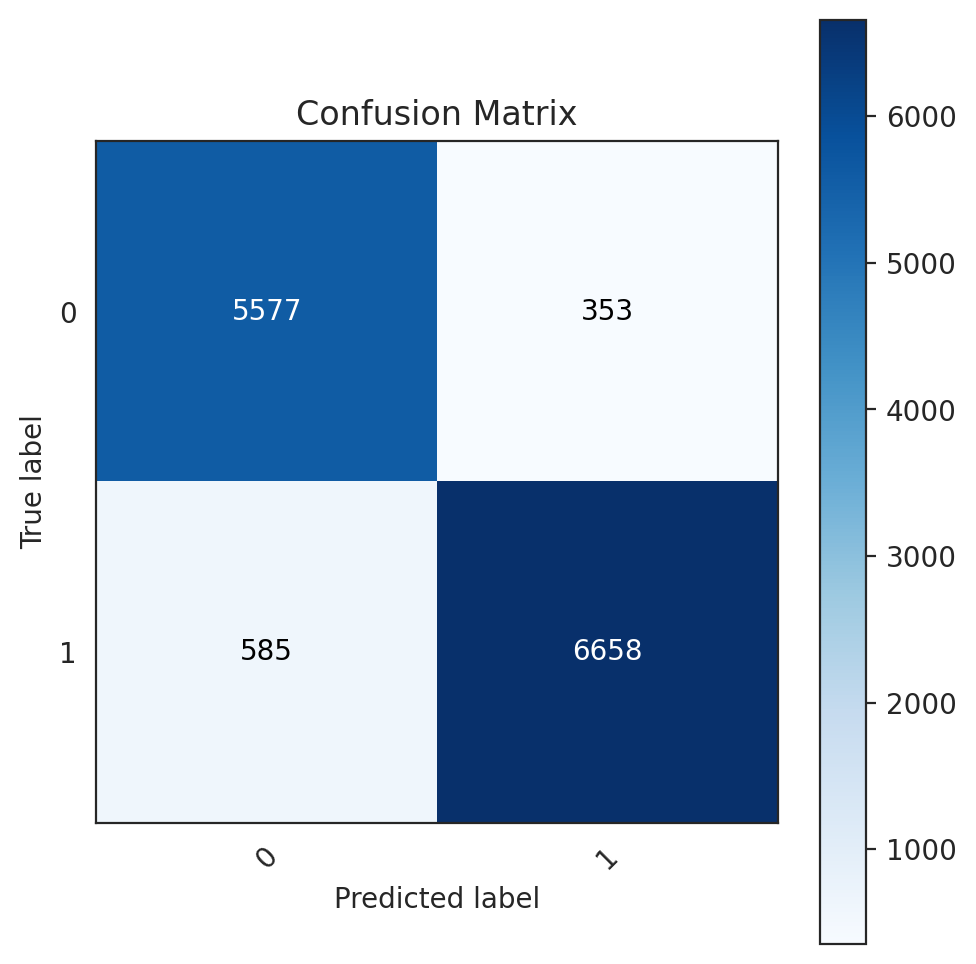

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [49]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 5.35 s, sys: 13.6 ms, total: 5.36 s
Wall time: 5.46 s


In [50]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.74%
Recall: 94.74%
Precision: 94.79%
F1-Score: 94.75%
time to train: 0.01 s
time to predict: 5.45 s
total: 5.46 s


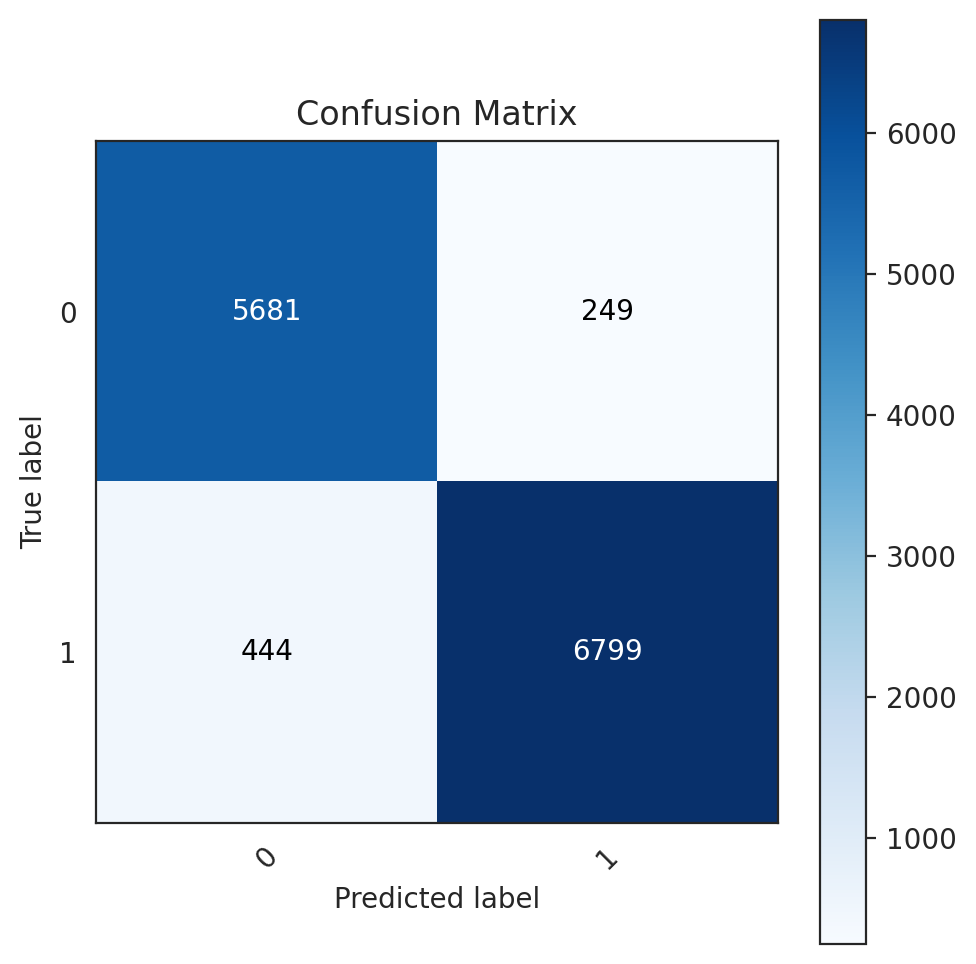

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [52]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.71 s, sys: 4.1 ms, total: 1.71 s
Wall time: 2.09 s


In [53]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.48%
Recall: 96.48%
Precision: 96.48%
F1-Score: 96.48%
time to train: 2.06 s
time to predict: 0.00 s
total: 2.06 s


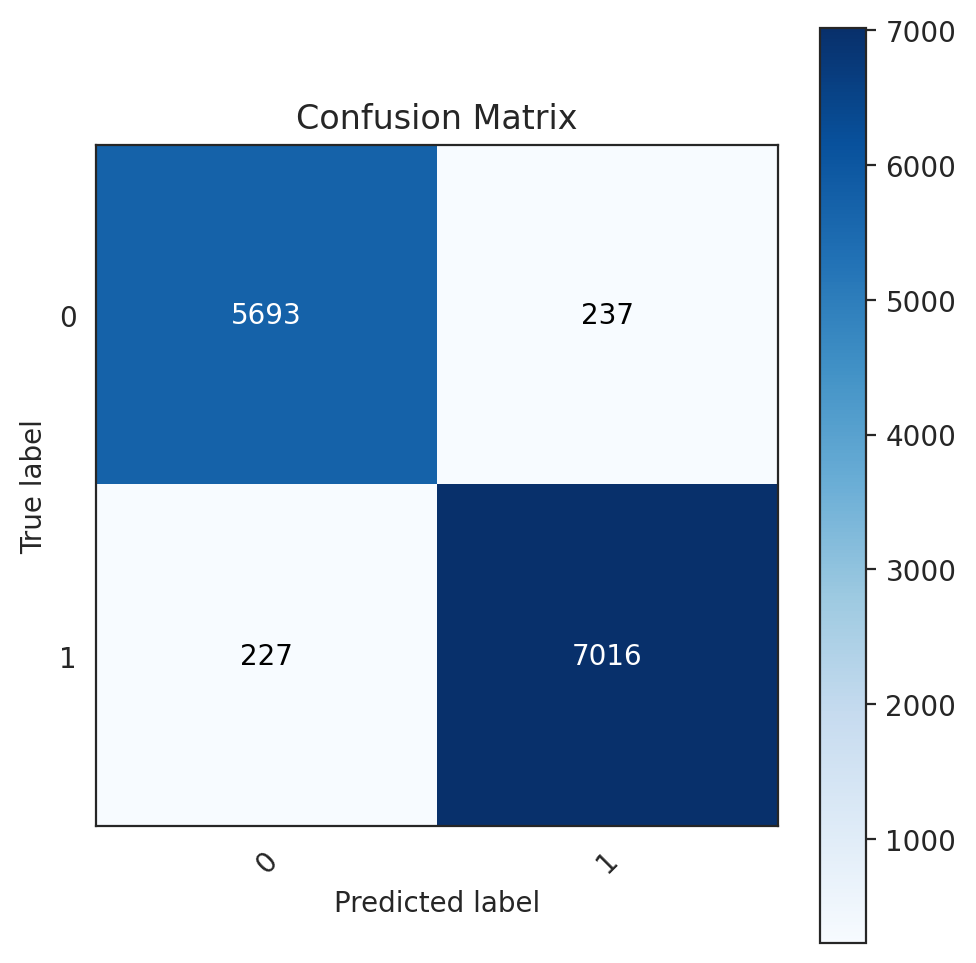

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


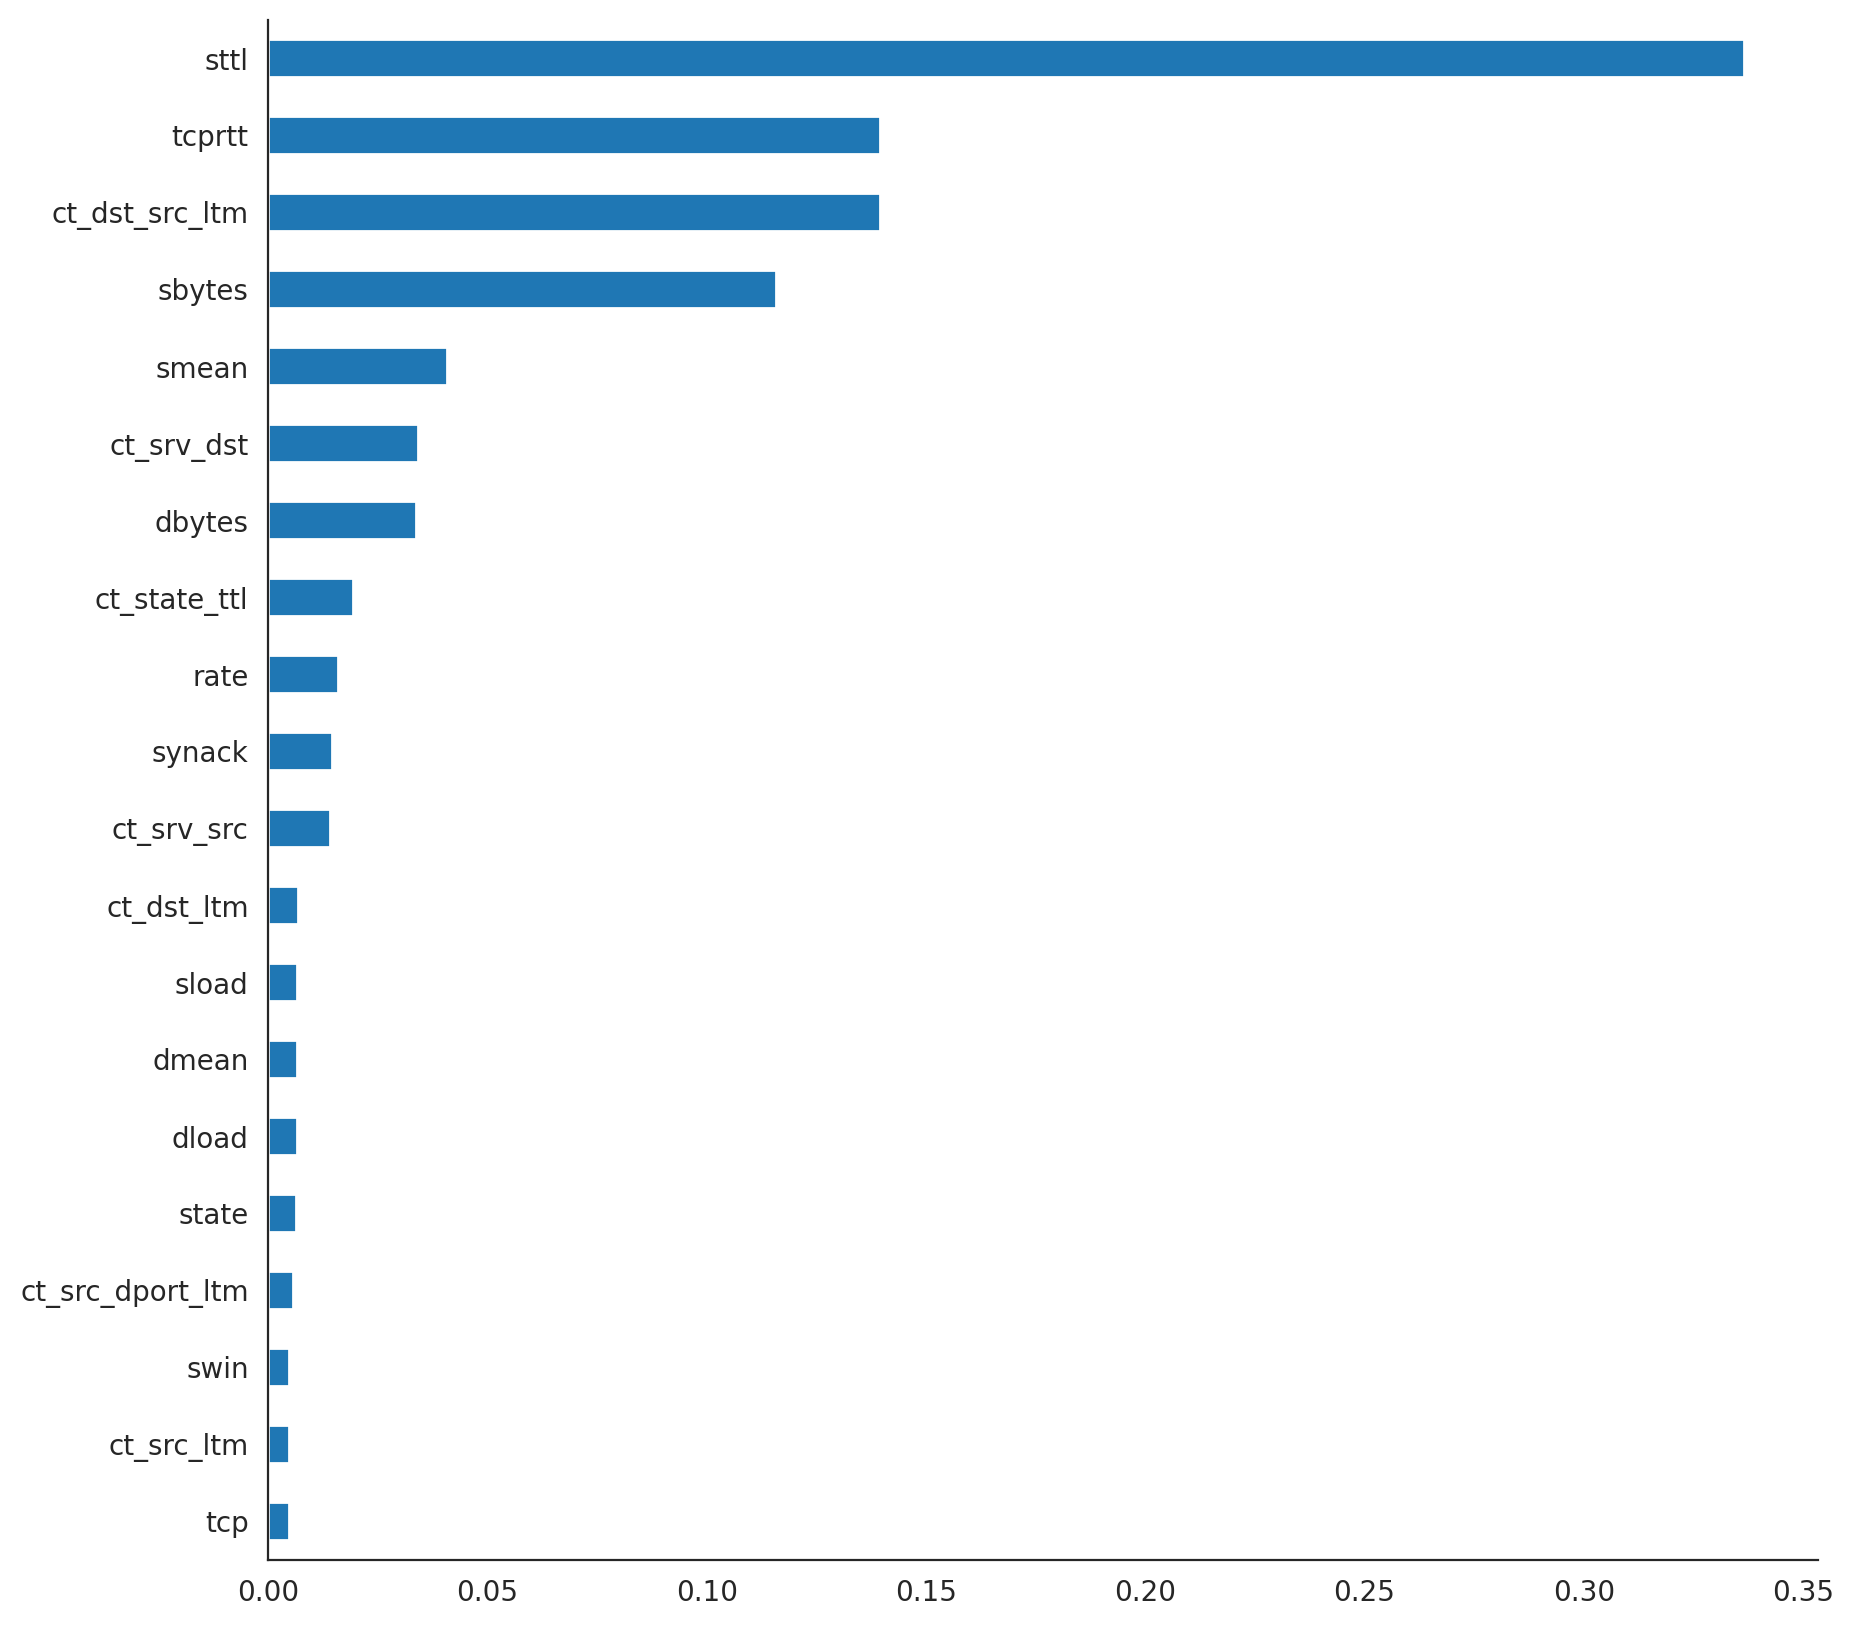

In [55]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [56]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 10.5 s, sys: 129 ms, total: 10.7 s
Wall time: 14.2 s


In [57]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.44%
Recall: 97.44%
Precision: 97.46%
F1-Score: 97.44%
time to train: 13.60 s
time to predict: 0.49 s
total: 14.09 s


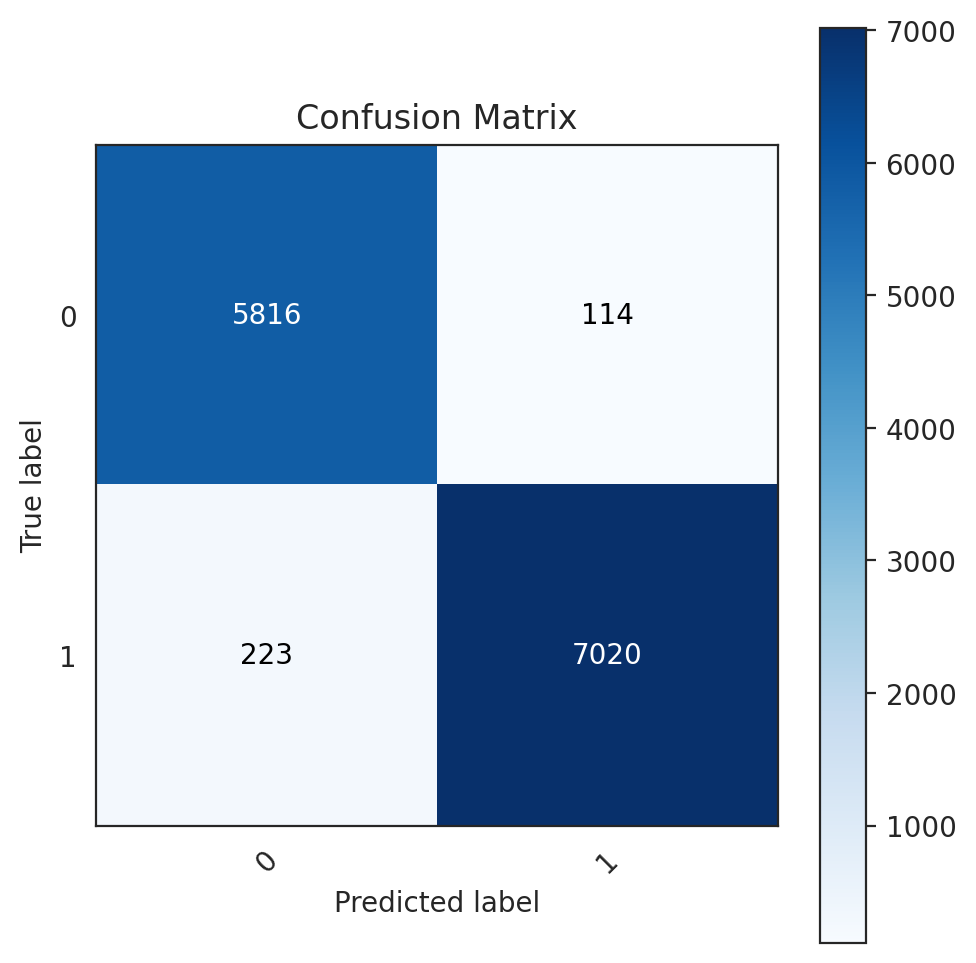

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


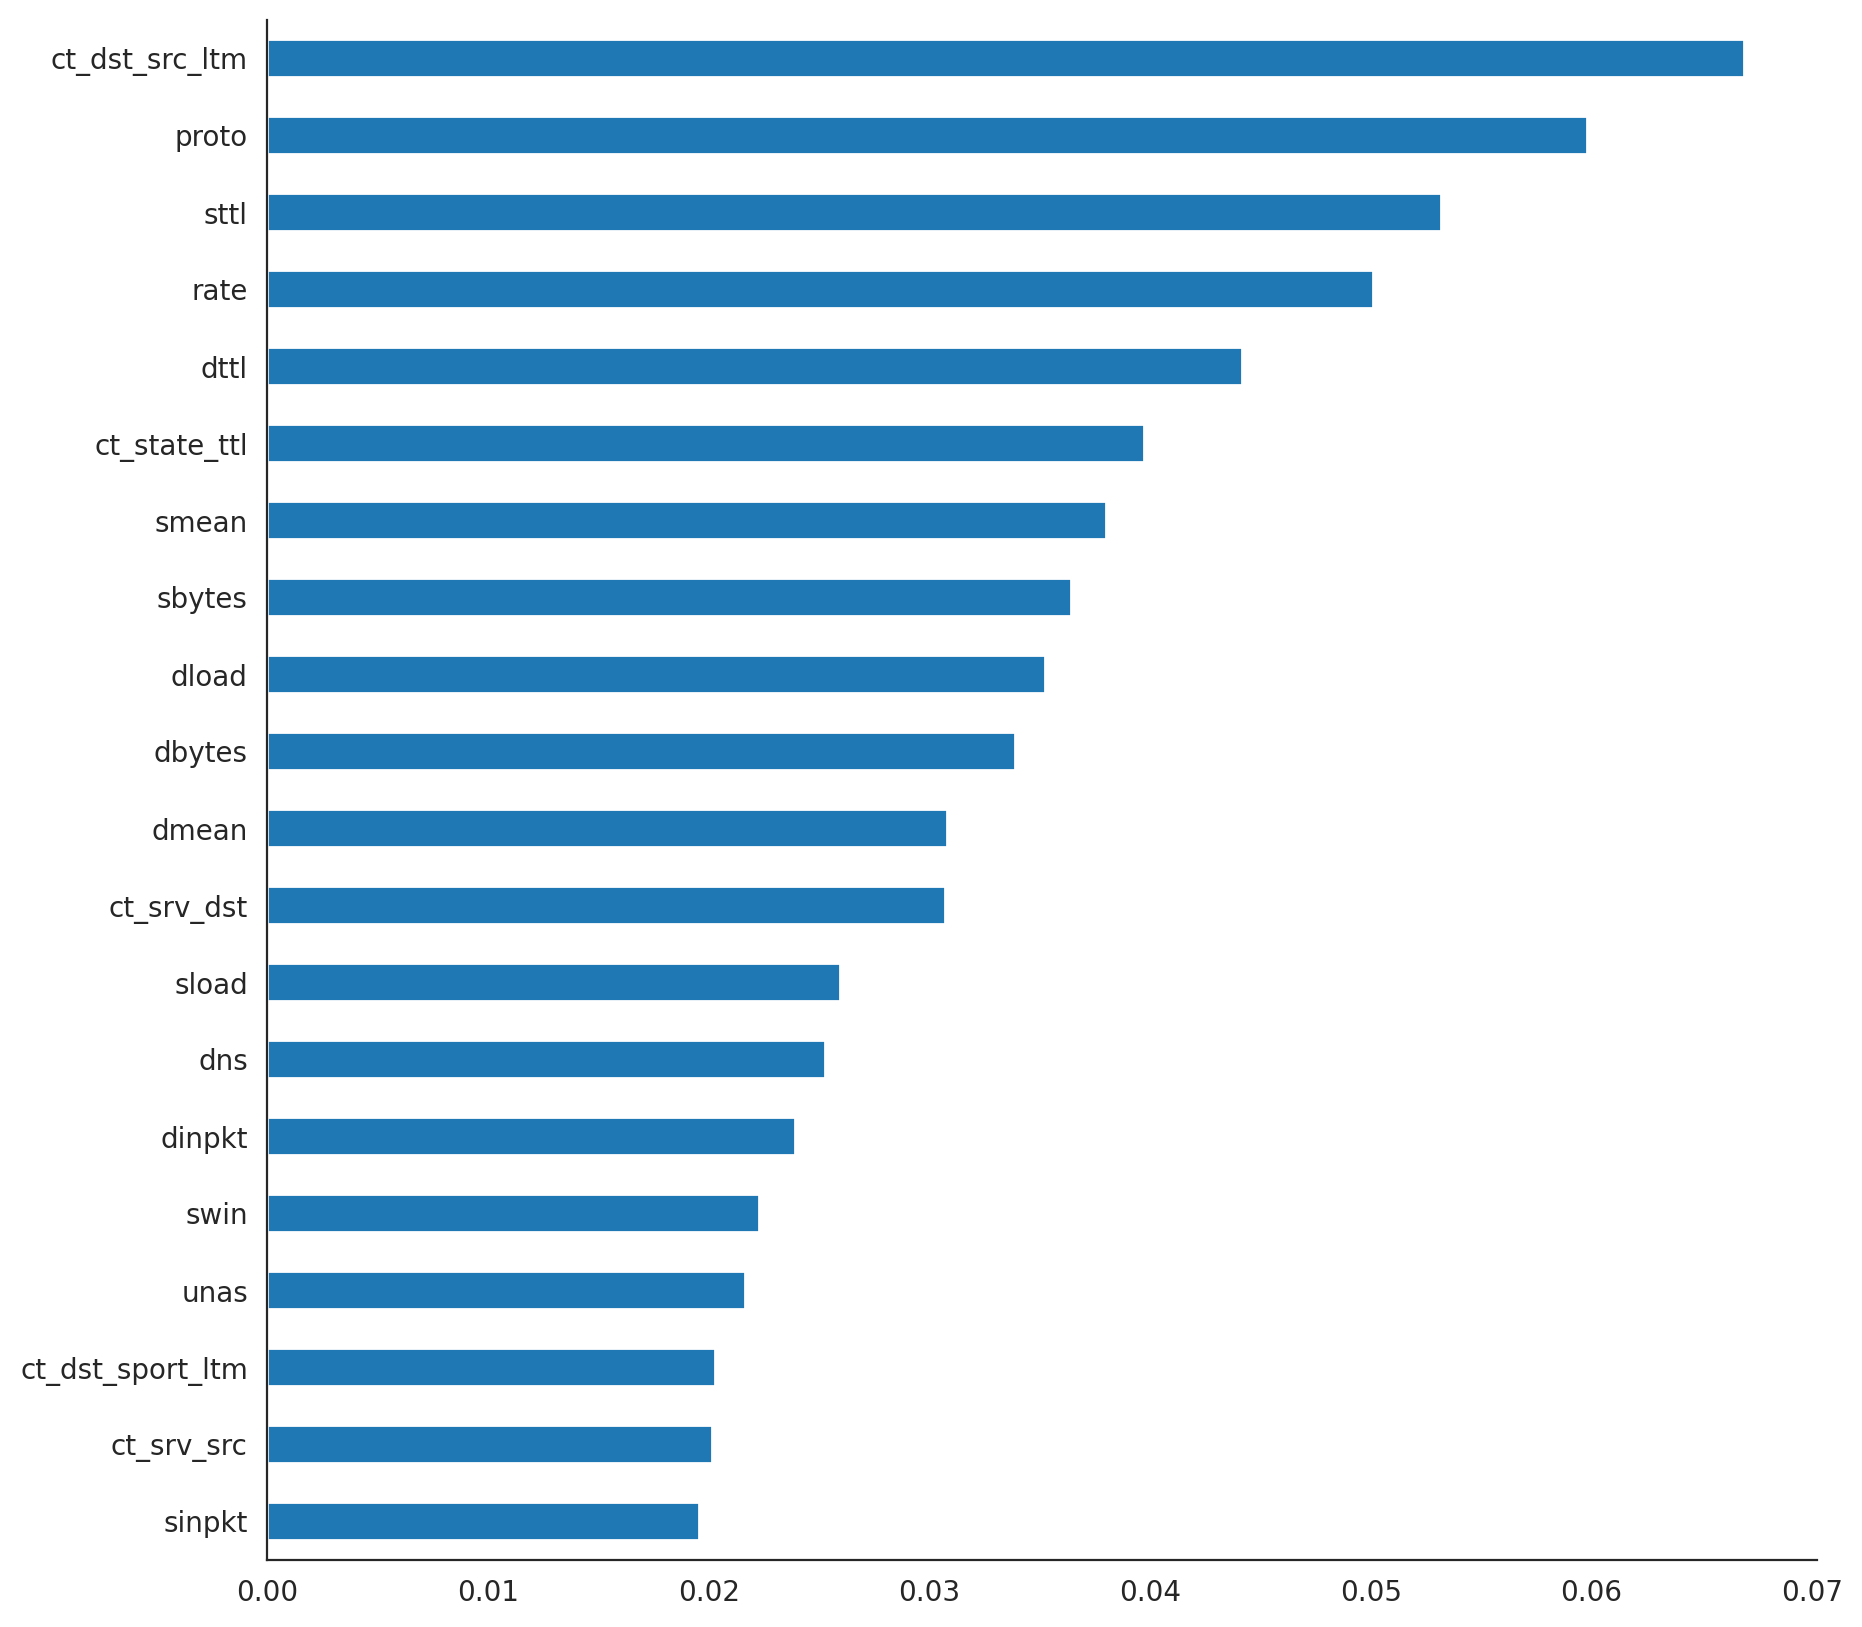

In [59]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [60]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 18.8 s, sys: 124 ms, total: 18.9 s
Wall time: 25.5 s


In [61]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.67%
Recall: 97.67%
Precision: 97.68%
F1-Score: 97.67%
time to train: 24.90 s
time to predict: 0.57 s
total: 25.46 s


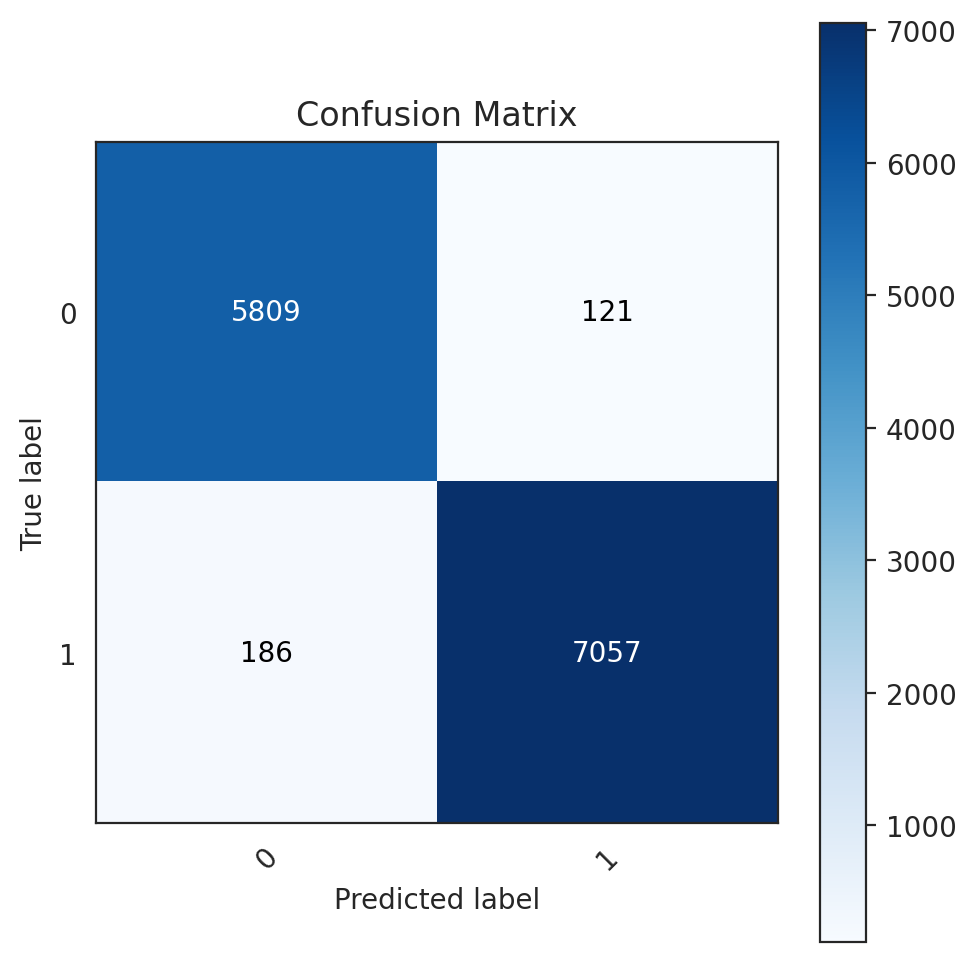

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


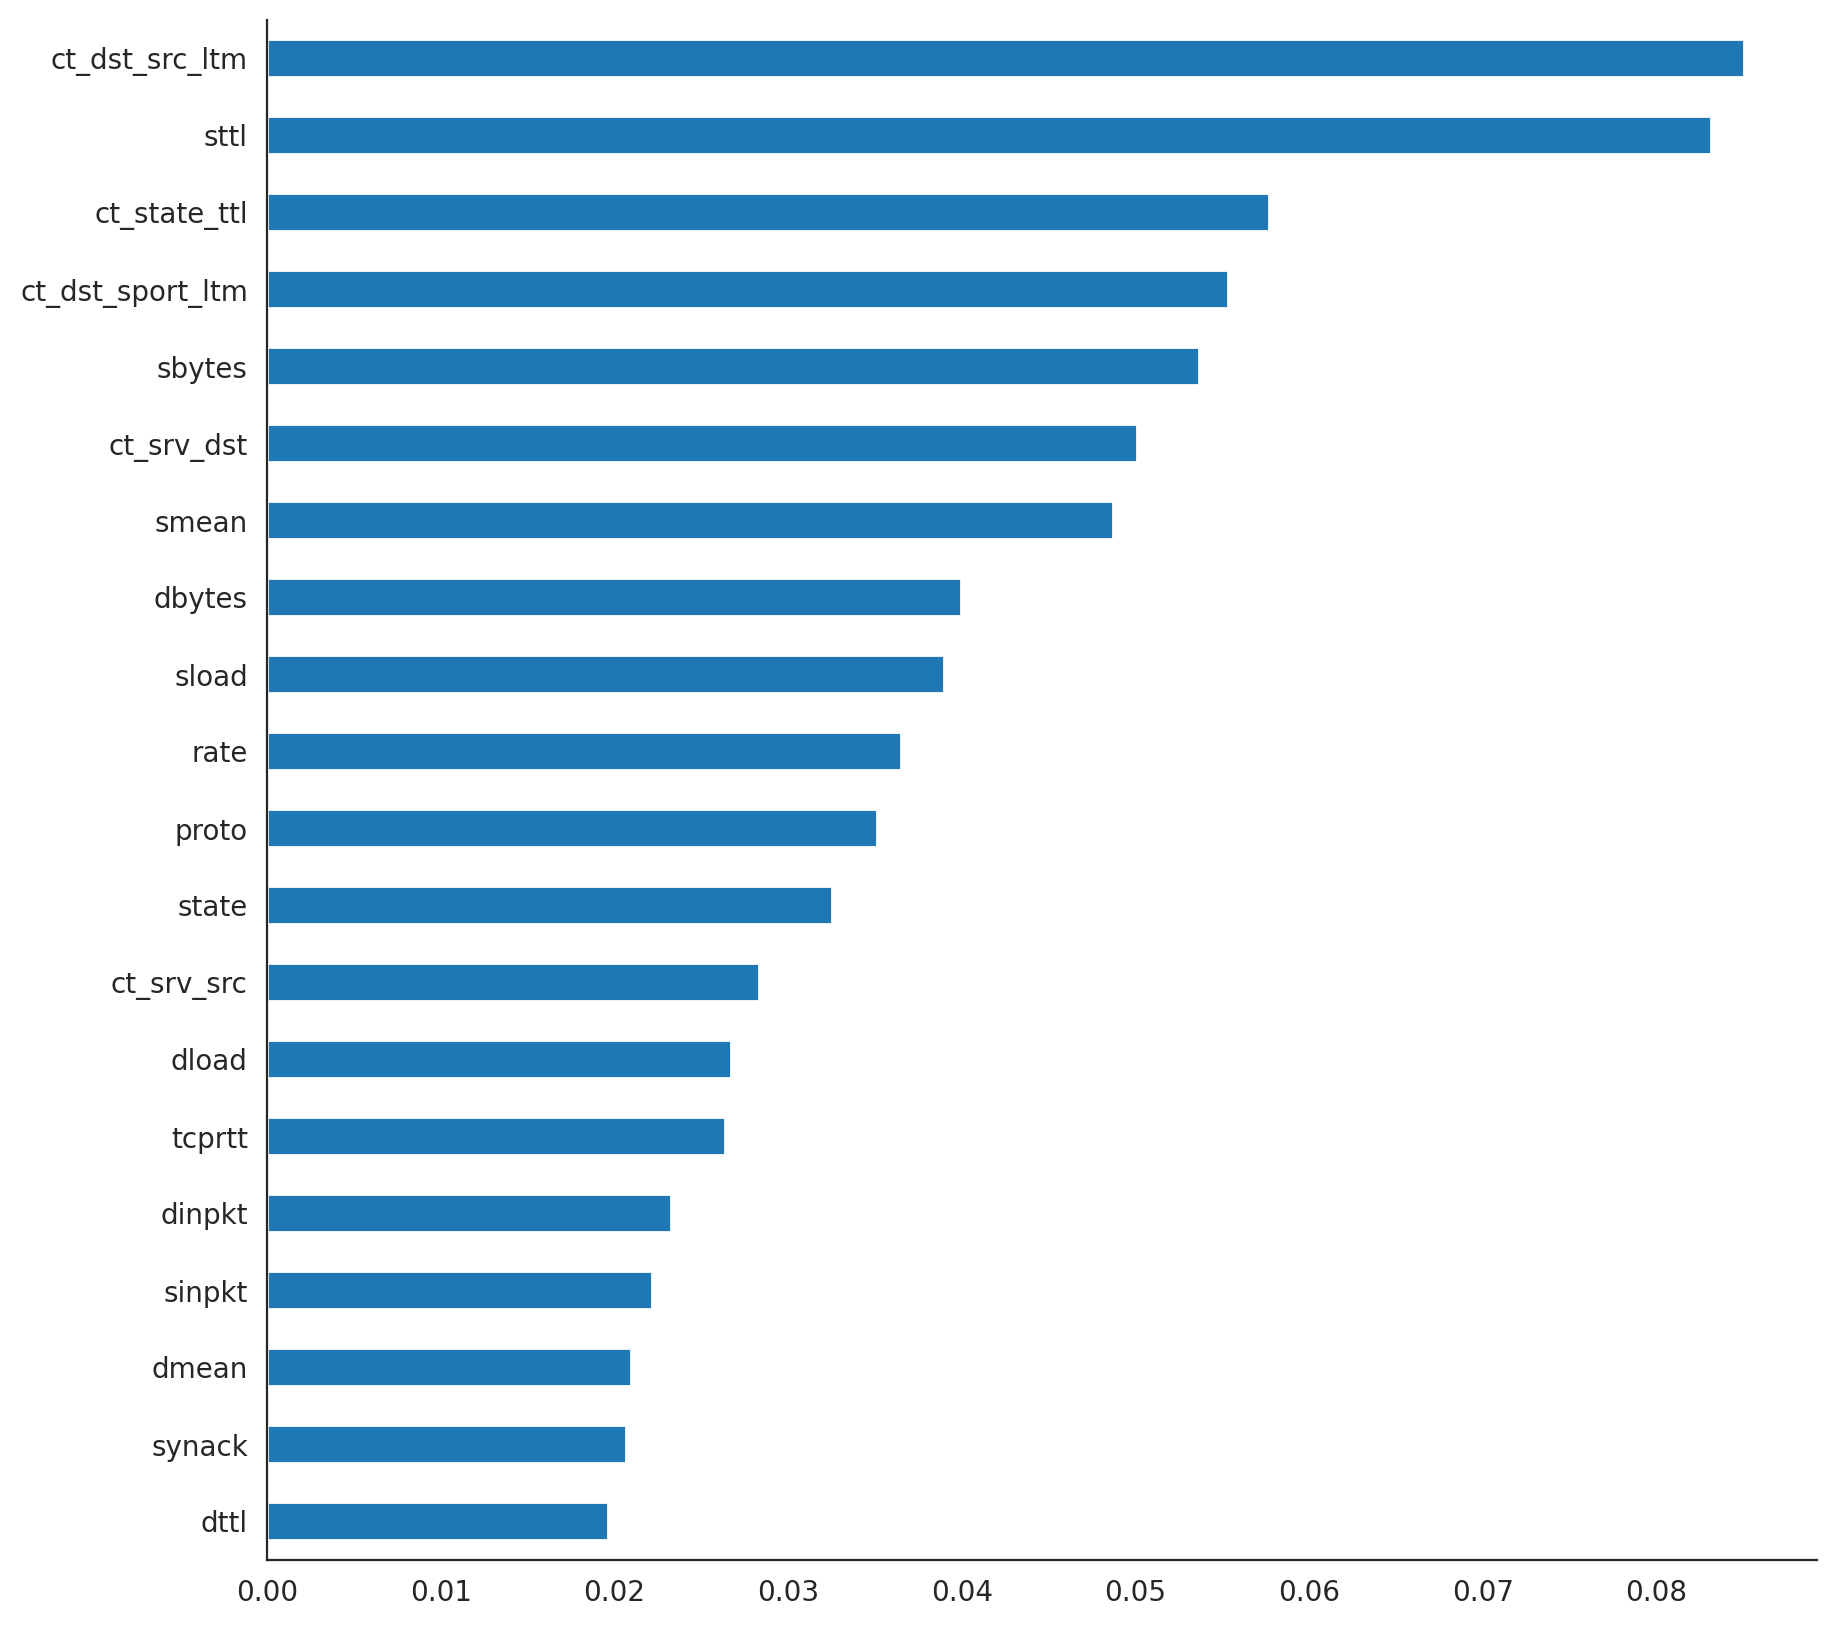

In [63]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [64]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 44.1 s, sys: 65.4 ms, total: 44.2 s
Wall time: 45 s


In [65]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.69%
Recall: 95.69%
Precision: 95.69%
F1-Score: 95.69%
time to train: 44.96 s
time to predict: 0.03 s
total: 44.99 s


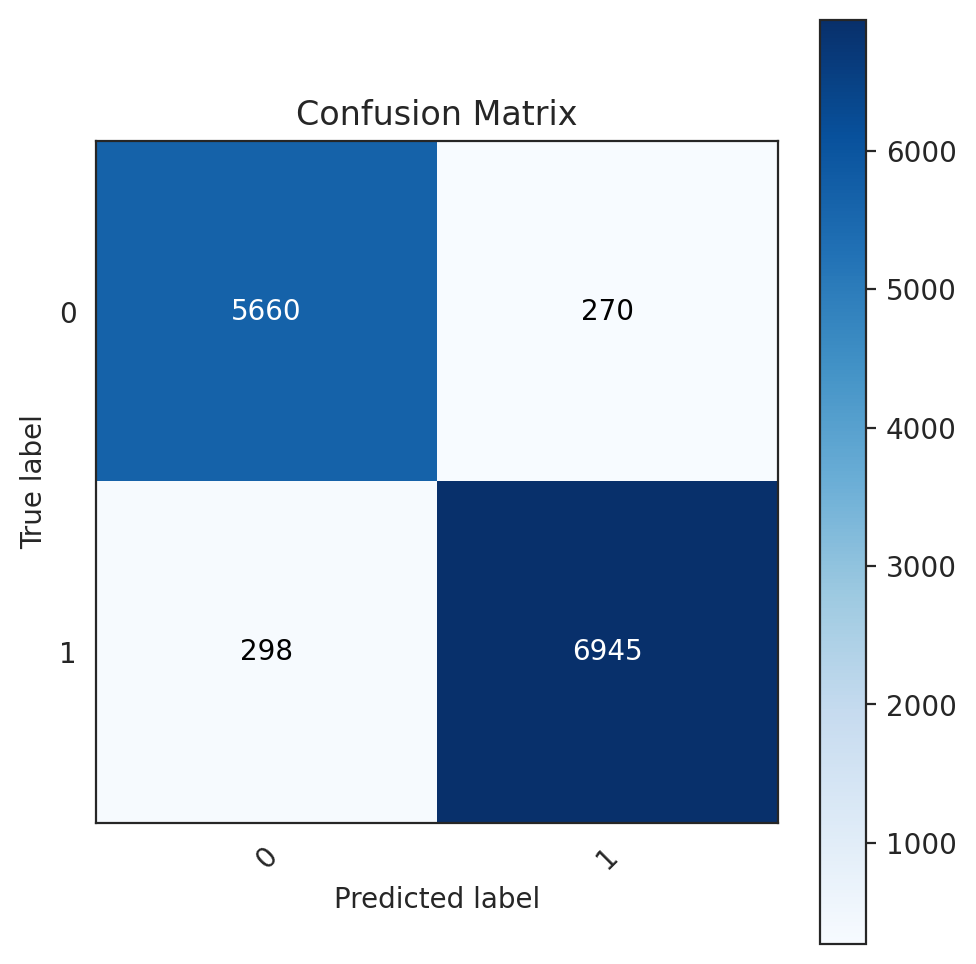

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


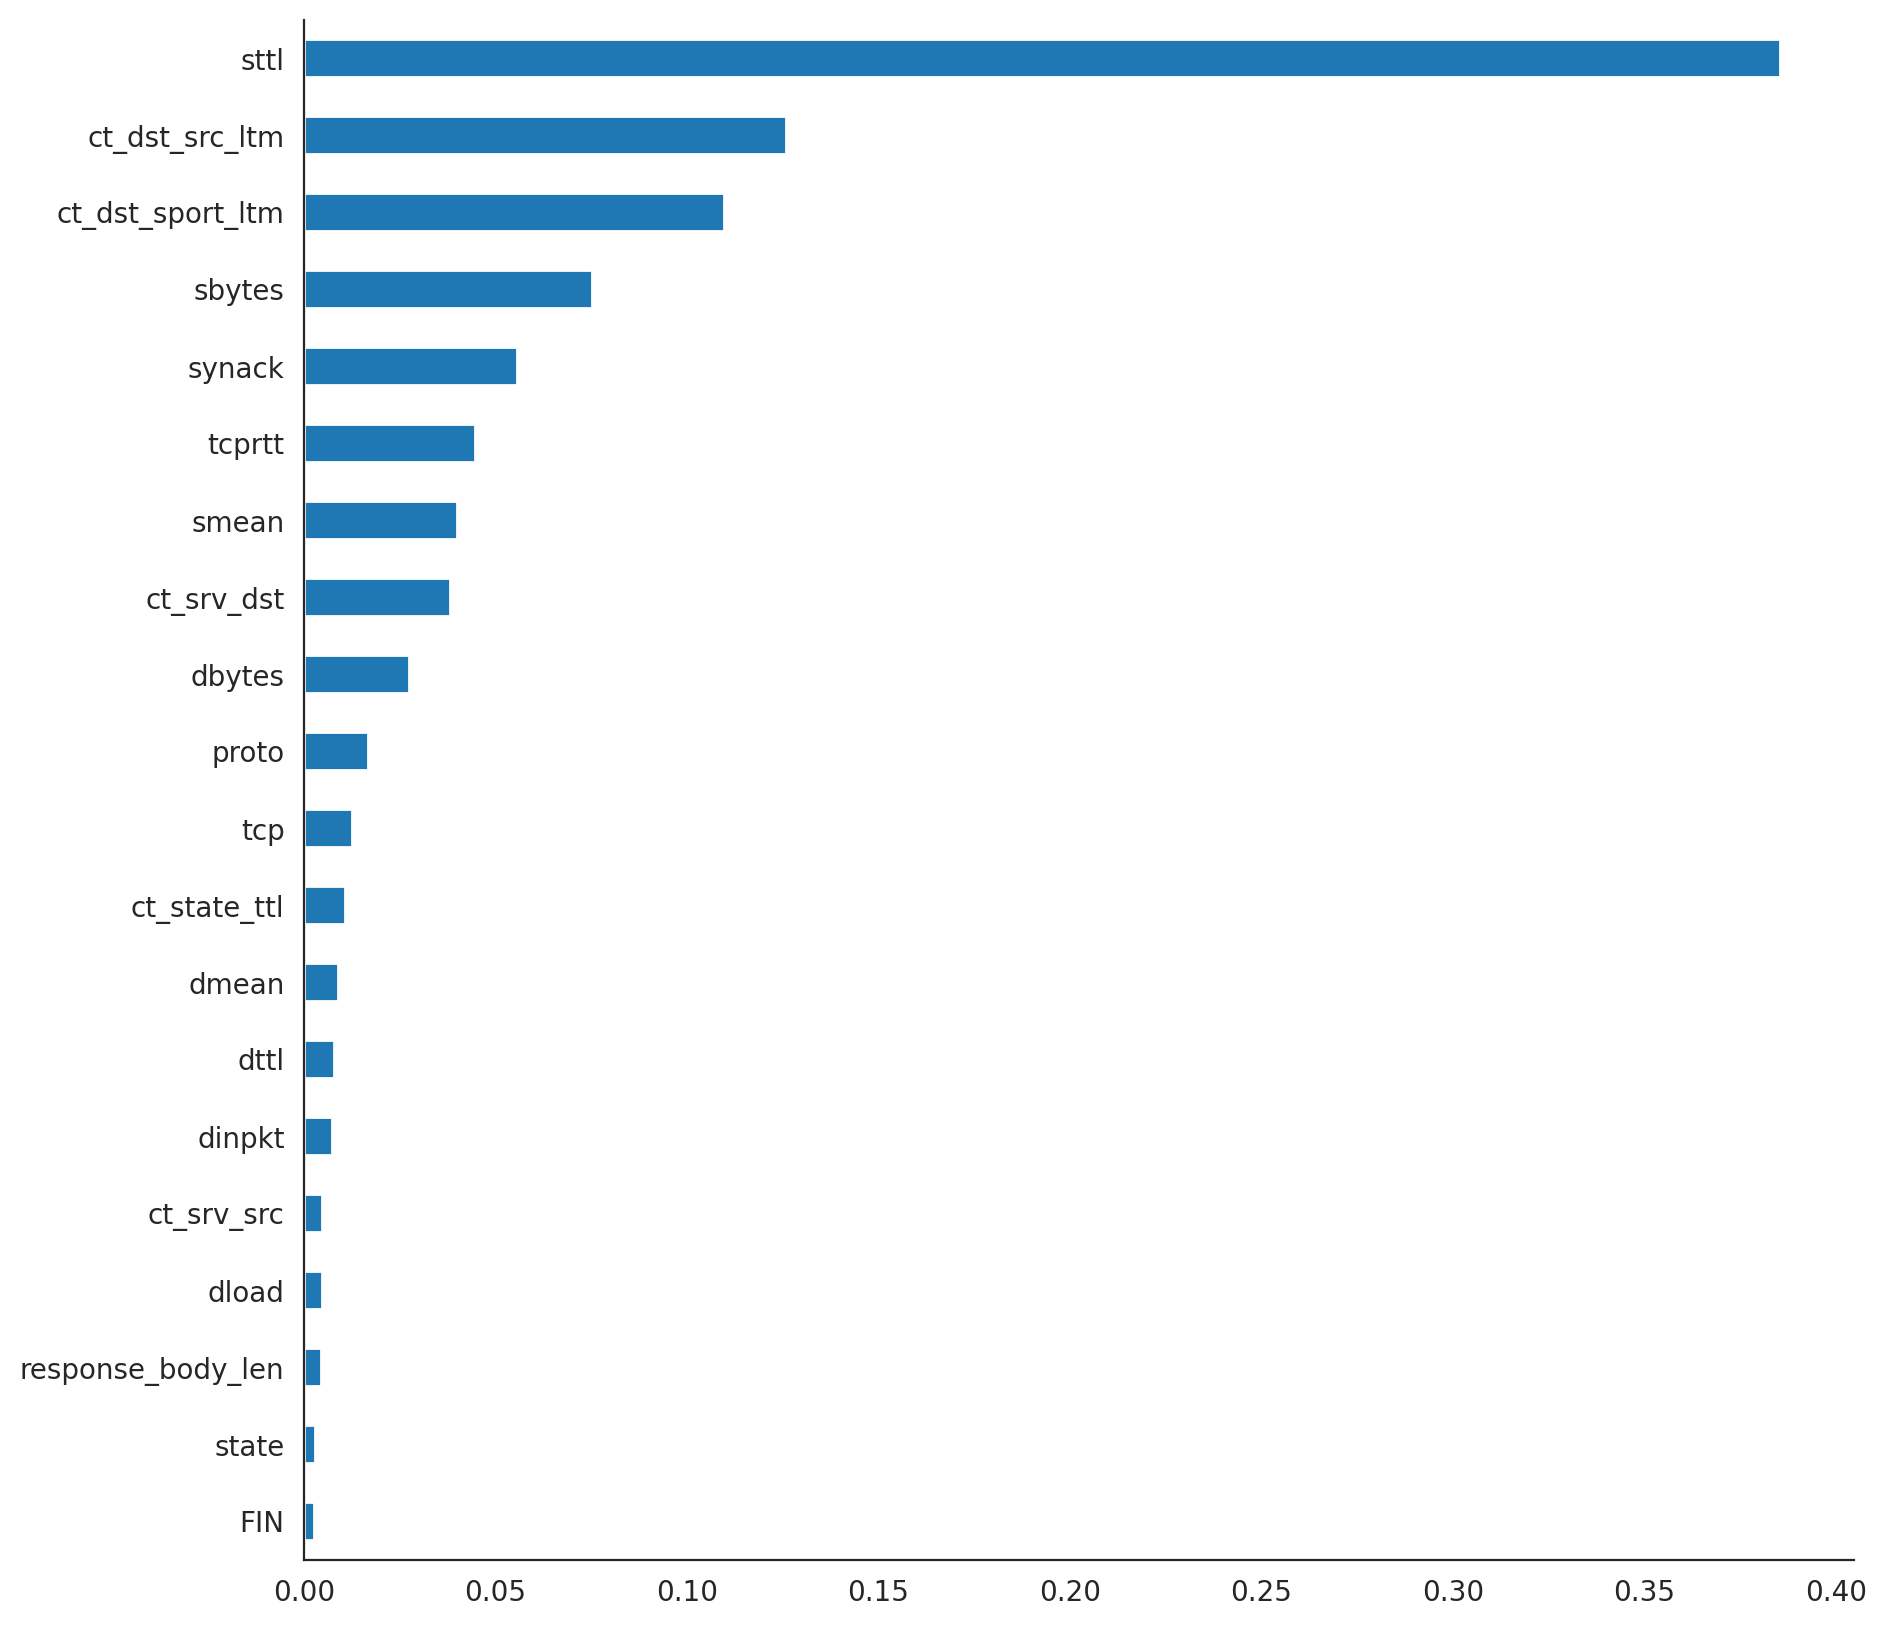

In [67]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [68]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,92.88%,92.88%,92.96%,92.89%,1.6,0.0,1.6
kNN,94.74%,94.74%,94.79%,94.75%,0.0,5.4,5.5
Decision Tree,96.48%,96.48%,96.48%,96.48%,2.1,0.0,2.1
Extra Trees,97.44%,97.44%,97.46%,97.44%,13.6,0.5,14.1
Random Forest,97.67%,97.67%,97.68%,97.67%,24.9,0.6,25.5
Gradient Boosting Classifier,95.69%,95.69%,95.69%,95.69%,45.0,0.0,45.0


In [69]:
pip install XlsxWriter


In [70]:
import pandas as pd

# Assuming you have a DataFrame named model_performance

styled_df = model_performance.style.background_gradient(cmap='coolwarm').format({
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'time to train': '{:.1f}',
    'time to predict': '{:.1f}',
    'total time': '{:.1f}',
})

# Save the styled DataFrame to an Excel file with color codes
output_excel_path = 'Result-FeatureSet1-TrainingSet80.xlsx'
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    styled_df.to_excel(writer, sheet_name='Sheet1', index=False)

# Access the xlsxwriter workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets['Sheet1']

# Get the xlsxwriter Style object from the Pandas Styler
pandas_styler = styled_df.to_excel(writer, sheet_name='Sheet1', index=False)
xf = pandas_styler
df = model_performance

# Use the XlsxWriter `apply()` method to customize the column widths
column_settings = [{'header': column} for column in df.columns]
worksheet.add_table(0, 0, df.shape[0], df.shape[1] - 1, {'columns': column_settings})

for idx, column in enumerate(df.columns):
    series = df[column]
    max_len = max((
        series.astype(str).map(len).max(),  # len of largest item
        len(str(column))  # len of column name/header
        )) + 1  # adding a little extra space

    worksheet.set_column(idx, idx, max_len)  # set column width

    # center align the header cells
    worksheet.write(0, idx, column, xf)

output_excel_path

'Result-FeatureSet1-TrainingSet80.xlsx'